In [52]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV

import warnings 
warnings.filterwarnings('ignore')

In [53]:
#import dataset
df=pd.read_csv("insurance.csv")

In [54]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [55]:
df.shape

(1338, 7)

In [56]:
#Checking Columns name
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [57]:
# Checking columns datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# a. Handle Missing values

In [58]:
#checking null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [59]:
# no missing value

# b. Handle Outliers

In [60]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [61]:
#finding numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
    
print(numerical_columns)

['age', 'bmi', 'children', 'charges']


In [62]:
df.shape

(1338, 7)

In [63]:
# 4 out of 7 columns are numeric, now these columns may contain outliers and we need to find and handle them.

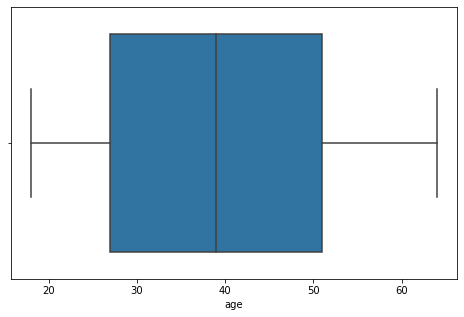



######################################################################


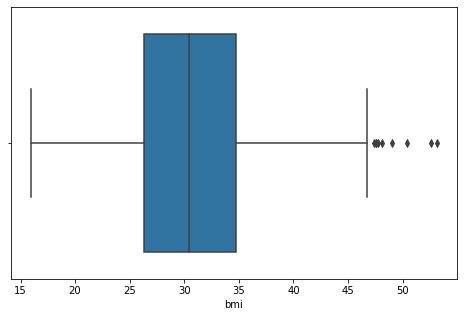



######################################################################


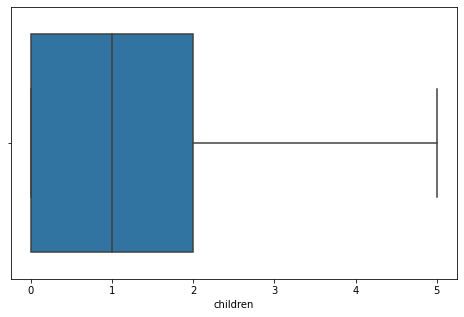



######################################################################


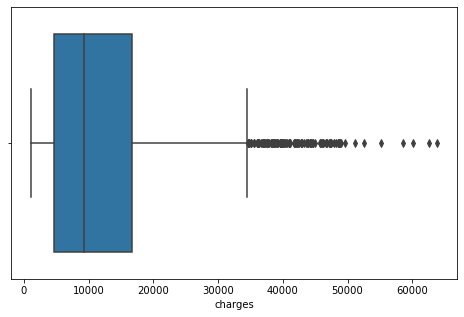



######################################################################


In [64]:
# checking outliers using box plot

for i in numerical_columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(df[i])
    plt.show()
    print('\n')
    print("#"*70)

In [65]:
# We can see that only 2 column outliers exist. So now we will replace those outliers with fence_low and fence_high

In [66]:
#defining a function for replace the outliers
def replace_outliers_with_whiskers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1  # Interquartile range
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr

    df[col_name] = np.where(df[col_name] < fence_low, fence_low, df[col_name])
    df[col_name] = np.where(df[col_name] > fence_high, fence_high, df[col_name])

In [67]:
#define a list of outliers columns
list_out = ['bmi', 'charges'] # geting from the box plot


In [68]:
df_no_outliers = df.copy()  # Create a copy of the original DataFrame

for var in list_out:
    replace_outliers_with_whiskers(df_no_outliers, var)

# Print the shape of the resulting DataFrame after replacing outliers with whisker values
print(df_no_outliers.shape)

(1338, 7)


In [69]:
df.shape

(1338, 7)

In [70]:
#no data loss

# c. Scaling

In [71]:
numerical_columns

['age', 'bmi', 'children', 'charges']

In [72]:
# We apply minmaxscaler to 'age', 'bmi', 'child' columns. We cannot apply this method to 'charge' column because 'charge' column is dependent variable (target variable).

In [73]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_vars = ['age', 'bmi', 'children']

df[num_vars] = scaler.fit_transform(df[num_vars])


In [74]:
df

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,0.321227,0.0,yes,southwest,16884.92400
1,0.000000,male,0.479150,0.2,no,southeast,1725.55230
2,0.217391,male,0.458434,0.6,no,southeast,4449.46200
3,0.326087,male,0.181464,0.0,no,northwest,21984.47061
4,0.304348,male,0.347592,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,0.695652,male,0.403820,0.6,no,northwest,10600.54830
1334,0.000000,female,0.429379,0.0,no,northeast,2205.98080
1335,0.000000,female,0.562012,0.0,no,southeast,1629.83350
1336,0.065217,female,0.264730,0.0,no,southwest,2007.94500


# d.	Feature Engineering

In [75]:
#find object type column

obj_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        obj_columns.append(i)
    
print(obj_columns)

['sex', 'smoker', 'region']


In [76]:
#Transfer categorical column to numeric column to apply linear regression
dummy=pd.get_dummies(df[['sex', 'smoker', 'region']])

In [77]:
dummy

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [78]:
df=pd.concat([df,dummy], axis=1)

In [79]:
df

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,female,0.321227,0.0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,0.000000,male,0.479150,0.2,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,0.217391,male,0.458434,0.6,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,0.326087,male,0.181464,0.0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,0.304348,male,0.347592,0.0,no,northwest,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,male,0.403820,0.6,no,northwest,10600.54830,0,1,1,0,0,1,0,0
1334,0.000000,female,0.429379,0.0,no,northeast,2205.98080,1,0,1,0,1,0,0,0
1335,0.000000,female,0.562012,0.0,no,southeast,1629.83350,1,0,1,0,0,0,1,0
1336,0.065217,female,0.264730,0.0,no,southwest,2007.94500,1,0,1,0,0,0,0,1


In [80]:
# Now drop the categorical column
df.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)

In [81]:
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,16884.92400,1,0,0,1,0,0,0,1
1,0.000000,0.479150,0.2,1725.55230,0,1,1,0,0,0,1,0
2,0.217391,0.458434,0.6,4449.46200,0,1,1,0,0,0,1,0
3,0.326087,0.181464,0.0,21984.47061,0,1,1,0,0,1,0,0
4,0.304348,0.347592,0.0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,10600.54830,0,1,1,0,0,1,0,0
1334,0.000000,0.429379,0.0,2205.98080,1,0,1,0,1,0,0,0
1335,0.000000,0.562012,0.0,1629.83350,1,0,1,0,0,0,1,0
1336,0.065217,0.264730,0.0,2007.94500,1,0,1,0,0,0,0,1


# e.	Feature selection using VIF and P Value, R-squared and Adjusted R-squared

In [82]:
# The query does not specify a target column and it needs to choose a dependent variable for this answer. and i  decide My Dependent Column Will be 'Charge'

In [83]:
# Declare feature vector and target variable
X = df.drop(['charges'], axis=1) # Data set of all independet variables

y = df['charges'] # Dataset of target variable

In [84]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,1,0,0,1,0,0,0,1
1,0.000000,0.479150,0.2,0,1,1,0,0,0,1,0
2,0.217391,0.458434,0.6,0,1,1,0,0,0,1,0
3,0.326087,0.181464,0.0,0,1,1,0,0,1,0,0
4,0.304348,0.347592,0.0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0,1,1,0,0,1,0,0
1334,0.000000,0.429379,0.0,1,0,1,0,1,0,0,0
1335,0.000000,0.562012,0.0,1,0,1,0,0,0,1,0
1336,0.065217,0.264730,0.0,1,0,1,0,0,0,0,1


In [85]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [86]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [87]:
## Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [88]:
regressor.coef_
regressor.intercept_
#
print('Slope:' ,regressor.coef_)
print('Intercept:', regressor.intercept_)

Slope: [ 11985.82124525  13094.87636079   2804.89645771    129.34911457
   -129.34911457 -12150.74526982  12150.74526982    334.317409
    415.96281324   -536.11393166   -214.16629058]
Intercept: 9210.107559503476


In [89]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train) # to add constant to the model

In [90]:
X_train_lm

,const,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
859,1.0,0.847826,0.326607,0.0,0,1,1,0,0,0,0,1
1327,1.0,0.717391,0.378531,0.2,0,1,1,0,0,0,1,0
564,1.0,0.000000,0.434759,0.4,1,0,1,0,0,0,1,0
739,1.0,0.239130,0.525693,0.4,0,1,0,1,0,0,0,1
966,1.0,0.717391,0.237692,0.4,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1180,1.0,0.521739,0.682405,0.2,1,0,1,0,1,0,0,0
1147,1.0,0.043478,0.429379,0.0,1,0,1,0,0,1,0,0
527,1.0,0.717391,0.264730,0.2,1,0,1,0,0,0,0,1
1149,1.0,0.521739,0.488028,0.0,0,1,1,0,0,0,0,1


In [91]:
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit() # Ordinary Least Square

#lr.params

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     394.4
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          3.53e-302
Time:                        23:34:06   Log-Likelihood:                -10150.
No. Observations:                1003   AIC:                         2.032e+04
Df Residuals:                     994   BIC:                         2.036e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4093.3811    262.114  

In [92]:
#####################VIF Calculations#######################

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,sex_female,inf
5,sex_male,inf
6,smoker_no,inf
7,smoker_yes,inf
8,region_northeast,inf
9,region_northwest,inf
10,region_southeast,inf
11,region_southwest,inf
2,bmi,1.11
1,age,1.03


In [ ]:
# Since all numeric columns ('bmi', 'age', 'child') have vif scores less than 5, Multicolinearity does not exist

In [ ]:
#Now we check the p value of each column if the p value of any column is less than 0.05 then it is important to predict the target column.
# We can prove this by observing the r squared value and the adj. r squared value

In [93]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     394.4
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          3.53e-302
Time:                        23:44:19   Log-Likelihood:                -10150.
No. Observations:                1003   AIC:                         2.032e+04
Df Residuals:                     994   BIC:                         2.036e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4093.3811    262.114  

In [94]:
# We can see that the p value of the "region_southeast" column is greater than 0.05. Now we drop this column and apply the OLS method


X_train_lm_1 = X_train_lm.drop(["region_southeast"], axis=1)

lr_1 = sm.OLS(y_train, X_train_lm_1).fit()

#lr_1.params

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     394.4
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          3.53e-302
Time:                        23:47:40   Log-Likelihood:                -10150.
No. Observations:                1003   AIC:                         2.032e+04
Df Residuals:                     994   BIC:                         2.036e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4336.9968    362.193  

In [97]:
# We can see that the p value of the "region_southwest" column is greater than 0.05. Now we drop this column and apply the OLS method


X_train_lm_2 = X_train_lm.drop(["region_southeast", "region_southwest"], axis=1)

lr_2 = sm.OLS(y_train, X_train_lm_2).fit()

#lr_2.params

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     450.9
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.92e-303
Time:                        00:30:26   Log-Likelihood:                -10150.
No. Observations:                1003   AIC:                         2.032e+04
Df Residuals:                     995   BIC:                         2.036e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4434.7584    322.790  

In [98]:
# We can see that Increase adj.  R squared from 0.758 to 0.759 after removing the 'Region Southwest' column. So this column is not important for predicting the dependent variable

In [99]:
# We can see that the p value of the "region_northeast" column is greater than 0.05. Now we drop this column and apply the OLS method


X_train_lm_3 = X_train_lm.drop(["region_southeast", "region_southwest", "region_northeast"], axis=1)

lr_3 = sm.OLS(y_train, X_train_lm_3).fit()

#lr_3.params

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     525.1
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.46e-304
Time:                        00:36:00   Log-Likelihood:                -10151.
No. Observations:                1003   AIC:                         2.032e+04
Df Residuals:                     996   BIC:                         2.035e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4607.9115    301.625  

In [100]:
# We can see that the p value of the "region_southwest" column is greater than 0.05. Now we drop this column and apply the OLS method


X_train_lm_4 = X_train_lm.drop(["region_southeast", "region_southwest", "region_northeast", "region_northwest"], axis=1)

lr_4 = sm.OLS(y_train, X_train_lm_4).fit()

#lr_4.params

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     629.5
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.91e-305
Time:                        00:38:17   Log-Likelihood:                -10152.
No. Observations:                1003   AIC:                         2.032e+04
Df Residuals:                     997   BIC:                         2.035e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4706.1863    290.341     16.209      0.0

In [1]:
# Now all columns have p values less than 0.05. Hence the contribution of this column is more important in predicting the dependent variable